# Load data and Transform

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import torch

In [2]:
from ChemSelML.bin.Label2Idx import get_Ar_R_dict


Correct_dict = {
    "C0h-2":  "C0h-0", "C0h-1":  "C0h-1", "C1b-7":  "C1b-0", "C1b-6":  "C1b-1", "C1b-5":  "C1b-2",
    "C1c-5":  "C1c-0", "C1c-4":  "C1c-1", "C1c-3":  "C1c-2", "C1d-5":  "C1d-0", "C1d-4":  "C1d-1",
    "C1d-3":  "C1d-2", "C1t-7":  "C1t-0", "C1t-6":  "C1t-1", "C1t-5":  "C1t-2", "C2b-6":  "C2b-0",
    "C2b-5":  "C2b-1", "C2b-8":  "C2b-3", "C2c-4":  "C2c-0", "C2c-3":  "C2c-1", "C2c-6":  "C2c-3",
    "C2d-4":  "C2d-0", "C2d-3":  "C2d-1", "C2d-6":  "C2d-3", "C2t-6":  "C2t-0", "C2t-5":  "C2t-1",
    "C2t-8":  "C2t-3", "D0h-2":  "D0h-0", "D0h-1":  "D0h-1", "D1b-7":  "D1b-0", "D1b-6":  "D1b-1",
    "D1b-5":  "D1b-2", "D1c-5":  "D1c-0", "D1c-4":  "D1c-1", "D1c-3":  "D1c-2", "D1d-5":  "D1d-0",
    "D1d-4":  "D1d-1", "D1d-3":  "D1d-2", "D1t-7":  "D1t-0", "D1t-6":  "D1t-1", "D1t-5":  "D1t-2",
    "D2b-6":  "D2b-0", "D2b-5":  "D2b-1", "D2b-8":  "D2b-3", "D2c-4":  "D2c-0", "D2c-3":  "D2c-1",
    "D2c-6":  "D2c-3", "D2d-4":  "D2d-0", "D2d-3":  "D2d-1", "D2d-6":  "D2d-3", "D2t-6":  "D2t-0",
    "D2t-5":  "D2t-1", "D2t-8":  "D2t-3", "E0h-2":  "E0h-0", "E0h-1":  "E0h-1", "E1b-7":  "E1b-0",
    "E1b-6":  "E1b-1", "E1b-5":  "E1b-2", "E1c-5":  "E1c-0", "E1c-4":  "E1c-1", "E1c-3":  "E1c-2",
    "E1d-5":  "E1d-0", "E1d-4":  "E1d-1", "E1d-3":  "E1d-2", "E1t-7":  "E1t-0", "E1t-6":  "E1t-1",
    "E1t-5":  "E1t-2", "E2b-6":  "E2b-0", "E2b-5":  "E2b-1", "E2b-8":  "E2b-3", "E2c-4":  "E2c-0",
    "E2c-3":  "E2c-1", "E2c-6":  "E2c-3", "E2d-4":  "E2d-0", "E2d-3":  "E2d-1", "E2d-6":  "E2d-3",
    "E2t-6":  "E2t-0", "E2t-5":  "E2t-1", "E2t-8":  "E2t-3", "F0h-3":  "F0h-0", "F0h-0":  "F0h-1",
    "F0h-1":  "F0h-2", "F1b-6":  "F1b-1", "F1b-7":  "F1b-2", "F1c-4":  "F1c-1", "F1c-5":  "F1c-2",
    "F1d-4":  "F1d-1", "F1d-5":  "F1d-2", "F1t-6":  "F1t-1", "F1t-7":  "F1t-2", "F2b-7":  "F2b-0",
    "F2b-5":  "F2b-2", "F2c-5":  "F2c-0", "F2c-3":  "F2c-2", "F2d-5":  "F2d-0", "F2d-3":  "F2d-2",
    "F2t-7":  "F2t-0", "F2t-5":  "F2t-2", "F3b-7":  "F3b-0", "F3b-5":  "F3b-1", "F3c-5":  "F3c-0",
    "F3c-3":  "F3c-1", "F3d-5":  "F3d-0", "F3d-3":  "F3d-1", "F3t-7":  "F3t-0", "F3t-5":  "F3t-1",
    "Fb0-1":  "Fb0-2", "Fb0-0":  "Fb0-3", "Fb0-4":  "Fb0-4", "Fb3b-5":  "Fb3b-3", "Fb3b-6":  "Fb3b-4",
    "Fb3c-3":  "Fb3c-3", "Fb3c-4":  "Fb3c-4", "Fb3d-3":  "Fb3d-3", "Fb3d-4":  "Fb3d-4", "Fb3t-5":  "Fb3t-3",
    "Fb3t-6":  "Fb3t-4", "Fb4b-5":  "Fb4b-2", "Fb4b-8":  "Fb4b-4", "Fb4c-3":  "Fb4c-2", "Fb4c-6":  "Fb4c-4",
    "Fb4d-3":  "Fb4d-2", "Fb4d-6":  "Fb4d-4", "Fb4t-5":  "Fb4t-2", "Fb4t-8":  "Fb4t-4", "Fb5b-6":  "Fb5b-2",
    "Fb5b-5":  "Fb5b-3", "Fb5c-4":  "Fb5c-2", "Fb5c-3":  "Fb5c-3", "Fb5d-4":  "Fb5d-2", "Fb5d-3":  "Fb5d-3",
    "Fb5t-6":  "Fb5t-2", "Fb5t-5":  "Fb5t-3", "Fc0-3":  "Fc0-1", "Fc0-0":  "Fc0-3", "Fc0-1":  "Fc0-4",
    "Fc2b-6":  "Fc2b-3", "Fc2b-7":  "Fc2b-4", "Fc2c-4":  "Fc2c-3", "Fc2c-5":  "Fc2c-4", "Fc2d-4":  "Fc2d-3",
    "Fc2d-5":  "Fc2d-4", "Fc2t-6":  "Fc2t-3", "Fc2t-7":  "Fc2t-4", "Fc4b-7":  "Fc4b-1", "Fc4b-5":  "Fc4b-4",
    "Fc4c-5":  "Fc4c-1", "Fc4c-3":  "Fc4c-4", "Fc4d-5":  "Fc4d-1", "Fc4d-3":  "Fc4d-4", "Fc4t-7":  "Fc4t-1",
    "Fc4t-5":  "Fc4t-4", "Fc5b-7":  "Fc5b-1", "Fc5b-5":  "Fc5b-3", "Fc5c-5":  "Fc5c-1", "Fc5c-3":  "Fc5c-3",
    "Fc5d-5":  "Fc5d-1", "Fc5d-3":  "Fc5d-3", "Fc5t-7":  "Fc5t-1", "Fc5t-5":  "Fc5t-3", "Fd0-1":  "Fd0-2",
    "Fd0-0":  "Fd0-3", "Fd0-4":  "Fd0-4", "Fd3b-5":  "Fd3b-3", "Fd3b-6":  "Fd3b-4", "Fd3c-3":  "Fd3c-3",
    "Fd3c-4":  "Fd3c-4", "Fd3d-3":  "Fd3d-3", "Fd3d-4":  "Fd3d-4", "Fd3t-5":  "Fd3t-3", "Fd3t-6":  "Fd3t-4",
    "Fd4b-5":  "Fd4b-2", "Fd4b-8":  "Fd4b-4", "Fd4c-3":  "Fd4c-2", "Fd4c-6":  "Fd4c-4", "Fd4d-3":  "Fd4d-2",
    "Fd4d-6":  "Fd4d-4", "Fd4t-5":  "Fd4t-2", "Fd4t-8":  "Fd4t-4", "Fd5b-6":  "Fd5b-2", "Fd5b-5":  "Fd5b-3",
    "Fd5c-4":  "Fd5c-2", "Fd5c-3":  "Fd5c-3", "Fd5d-4":  "Fd5d-2", "Fd5d-3":  "Fd5d-3", "Fd5t-6":  "Fd5t-2",
    "Fd5t-5":  "Fd5t-3", "Fe0-3":  "Fe0-1", "Fe0-0":  "Fe0-3", "Fe0-1":  "Fe0-4", "Fe2b-6":  "Fe2b-3",
    "Fe2b-7":  "Fe2b-4", "Fe2c-4":  "Fe2c-3", "Fe2c-5":  "Fe2c-4", "Fe2d-4":  "Fe2d-3", "Fe2d-5":  "Fe2d-4",
    "Fe2t-6":  "Fe2t-3", "Fe2t-7":  "Fe2t-4", "Fe4b-7":  "Fe4b-1", "Fe4b-5":  "Fe4b-4", "Fe4c-5":  "Fe4c-1",
    "Fe4c-3":  "Fe4c-4", "Fe4d-5":  "Fe4d-1", "Fe4d-3":  "Fe4d-4", "Fe4t-7":  "Fe4t-1", "Fe4t-5":  "Fe4t-4",
    "Fe5b-7":  "Fe5b-1", "Fe5b-5":  "Fe5b-3", "Fe5c-5":  "Fe5c-1", "Fe5c-3":  "Fe5c-3", "Fe5d-5":  "Fe5d-1",
    "Fe5d-3":  "Fe5d-3", "Fe5t-7":  "Fe5t-1", "Fe5t-5":  "Fe5t-3", "Ff0-1":  "Ff0-2", "Ff0-0":  "Ff0-3",
    "Ff0-4":  "Ff0-4", "Ff3b-5":  "Ff3b-3", "Ff3b-6":  "Ff3b-4", "Ff3c-3":  "Ff3c-3", "Ff3c-4":  "Ff3c-4",
    "Ff3d-3":  "Ff3d-3", "Ff3d-4":  "Ff3d-4", "Ff3t-5":  "Ff3t-3", "Ff3t-6":  "Ff3t-4", "Ff4b-5":  "Ff4b-2",
    "Ff4b-8":  "Ff4b-4", "Ff4c-3":  "Ff4c-2", "Ff4c-6":  "Ff4c-4", "Ff4d-3":  "Ff4d-2", "Ff4d-6":  "Ff4d-4",
    "Ff4t-5":  "Ff4t-2", "Ff4t-8":  "Ff4t-4", "Ff5b-6":  "Ff5b-2", "Ff5b-5":  "Ff5b-3", "Ff5c-4":  "Ff5c-2",
    "Ff5c-3":  "Ff5c-3", "Ff5d-4":  "Ff5d-2", "Ff5d-3":  "Ff5d-3", "Ff5t-6":  "Ff5t-2", "Ff5t-5":  "Ff5t-3",
    "G0h-4":  "G0h-0", "G0h-5":  "G0h-1", "G0h-0":  "G0h-2", "G0hH-4":  "G0hH-0", "G0hH-5":  "G0hH-1",
    "G0hH-0":  "G0hH-2", "G1b-5":  "G1b-1", "G1b-6":  "G1b-2", "G1b-7":  "G1b-3", "G1b-8":  "G1b-4",
    "G1bH-5":  "G1bH-1", "G1bH-6":  "G1bH-2", "G1bH-7":  "G1bH-3", "G1bH-8":  "G1bH-4", "G1c-3":  "G1c-1",
    "G1c-4":  "G1c-2", "G1c-5":  "G1c-3", "G1c-6":  "G1c-4", "G1cH-3":  "G1cH-1", "G1cH-4":  "G1cH-2",
    "G1cH-5":  "G1cH-3", "G1cH-6":  "G1cH-4", "G1d-3":  "G1d-1", "G1d-4":  "G1d-2", "G1d-5":  "G1d-3",
    "G1d-6":  "G1d-4", "G1dH-3":  "G1dH-1", "G1dH-4":  "G1dH-2", "G1dH-5":  "G1dH-3", "G1dH-6":  "G1dH-4",
    "G1t-5":  "G1t-1", "G1t-6":  "G1t-2", "G1t-7":  "G1t-3", "G1t-8":  "G1t-4", "G1tH-5":  "G1tH-1",
    "G1tH-6":  "G1tH-2", "G1tH-7":  "G1tH-3", "G1tH-8":  "G1tH-4", "G2b-9":  "G2b-0", "G2b-5":  "G2b-2",
    "G2b-6":  "G2b-3", "G2b-7":  "G2b-4", "G2bH-9":  "G2bH-0", "G2bH-5":  "G2bH-2", "G2bH-6":  "G2bH-3",
    "G2bH-7":  "G2bH-4", "G2c-7":  "G2c-0", "G2c-3":  "G2c-2", "G2c-4":  "G2c-3", "G2c-5":  "G2c-4",
    "G2cH-7":  "G2cH-0", "G2cH-3":  "G2cH-2", "G2cH-4":  "G2cH-3", "G2cH-5":  "G2cH-4", "G2d-7":  "G2d-0",
    "G2d-3":  "G2d-2", "G2d-4":  "G2d-3", "G2d-5":  "G2d-4", "G2dH-7":  "G2dH-0", "G2dH-3":  "G2dH-2",
    "G2dH-4":  "G2dH-3", "G2dH-5":  "G2dH-4", "G2t-9":  "G2t-0", "G2t-5":  "G2t-2", "G2t-6":  "G2t-3",
    "G2t-7":  "G2t-4", "G2tH-9":  "G2tH-0", "G2tH-5":  "G2tH-2", "G2tH-6":  "G2tH-3", "G2tH-7":  "G2tH-4",
    "G3b-6":  "G3b-0", "G3b-5":  "G3b-1", "G3bH-6":  "G3bH-0", "G3bH-5":  "G3bH-1", "G3c-4":  "G3c-0",
    "G3c-3":  "G3c-1", "G3cH-4":  "G3cH-0", "G3cH-3":  "G3cH-1", "G3d-4":  "G3d-0", "G3d-3":  "G3d-1",
    "G3dH-4":  "G3dH-0", "G3dH-3":  "G3dH-1", "G3t-6":  "G3t-0", "G3t-5":  "G3t-1", "G3tH-6":  "G3tH-0",
    "G3tH-5":  "G3tH-1", "H01b-5":  "H01b-0", "H01b-7":  "H01b-2", "H01b-8":  "H01b-3", "H01bH-5":  "H01bH-0",
    "H01bH-7":  "H01bH-2", "H01bH-8":  "H01bH-3", "H01c-3":  "H01c-0", "H01c-5":  "H01c-2", "H01c-6":  "H01c-3",
    "H01cH-3":  "H01cH-0", "H01cH-5":  "H01cH-2", "H01cH-6":  "H01cH-3", "H01d-3":  "H01d-0", "H01d-5":  "H01d-2",
    "H01d-6":  "H01d-3", "H01dH-3":  "H01dH-0", "H01dH-5":  "H01dH-2", "H01dH-6":  "H01dH-3", "H01t-5":  "H01t-0",
    "H01t-7":  "H01t-2", "H01t-8":  "H01t-3", "H01tH-5":  "H01tH-0", "H01tH-7":  "H01tH-2", "H01tH-8":  "H01tH-3",
    "HFa0-3":  "HFa0-1", "HFa0-0":  "HFa0-3", "HFa0-1":  "HFa0-4", "HFa2b-6":  "HFa2b-3", "HFa2b-7":  "HFa2b-4",
    "HFa2c-4":  "HFa2c-3", "HFa2c-5":  "HFa2c-4", "HFa2d-4":  "HFa2d-3", "HFa2d-5":  "HFa2d-4", "HFa2t-6":  "HFa2t-3",
    "HFa2t-7":  "HFa2t-4", "HFa4b-7":  "HFa4b-1", "HFa4b-5":  "HFa4b-4", "HFa4c-5":  "HFa4c-1", "HFa4c-3":  "HFa4c-4",
    "HFa4d-5":  "HFa4d-1", "HFa4d-3":  "HFa4d-4", "HFa4t-7":  "HFa4t-1", "HFa4t-5":  "HFa4t-4", "HFa5b-7":  "HFa5b-1",
    "HFa5b-5":  "HFa5b-3", "HFa5c-5":  "HFa5c-1", "HFa5c-3":  "HFa5c-3", "HFa5d-5":  "HFa5d-1", "HFa5d-3":  "HFa5d-3",
    "HFa5t-7":  "HFa5t-1", "HFa5t-5":  "HFa5t-3", "HFb0-1":  "HFb0-2", "HFb0-0":  "HFb0-3", "HFb0-4":  "HFb0-4",
    "HFb3b-5":  "HFb3b-3", "HFb3b-6":  "HFb3b-4", "HFb3c-3":  "HFb3c-3", "HFb3c-4":  "HFb3c-4", "HFb3d-3":  "HFb3d-3",
    "HFb3d-4":  "HFb3d-4", "HFb3t-5":  "HFb3t-3", "HFb3t-6":  "HFb3t-4", "HFb4b-5":  "HFb4b-2", "HFb4b-8":  "HFb4b-4",
    "HFb4c-3":  "HFb4c-2", "HFb4c-6":  "HFb4c-4", "HFb4d-3":  "HFb4d-2", "HFb4d-6":  "HFb4d-4", "HFb4t-5":  "HFb4t-2",
    "HFb4t-8":  "HFb4t-4", "HFb5b-6":  "HFb5b-2", "HFb5b-5":  "HFb5b-3", "HFb5c-4":  "HFb5c-2", "HFb5c-3":  "HFb5c-3",
    "HFb5d-4":  "HFb5d-2", "HFb5d-3":  "HFb5d-3", "HFb5t-6":  "HFb5t-2", "HFb5t-5":  "HFb5t-3", "HFc0-3":  "HFc0-1",
    "HFc0-0":  "HFc0-3", "HFc0-1":  "HFc0-4", "HFc2b-6":  "HFc2b-3", "HFc2b-7":  "HFc2b-4", "HFc2c-4":  "HFc2c-3",
    "HFc2c-5":  "HFc2c-4", "HFc2d-4":  "HFc2d-3", "HFc2d-5":  "HFc2d-4", "HFc2t-6":  "HFc2t-3", "HFc2t-7":  "HFc2t-4",
    "HFc4b-7":  "HFc4b-1", "HFc4b-5":  "HFc4b-4", "HFc4c-5":  "HFc4c-1", "HFc4c-3":  "HFc4c-4", "HFc4d-5":  "HFc4d-1",
    "HFc4d-3":  "HFc4d-4", "HFc4t-7":  "HFc4t-1", "HFc4t-5":  "HFc4t-4", "HFc5b-7":  "HFc5b-1", "HFc5b-5":  "HFc5b-3",
    "HFc5c-5":  "HFc5c-1", "HFc5c-3":  "HFc5c-3", "HFc5d-5":  "HFc5d-1", "HFc5d-3":  "HFc5d-3", "HFc5t-7":  "HFc5t-1",
    "HFc5t-5":  "HFc5t-3", "HFd0-1":  "HFd0-2", "HFd0-0":  "HFd0-3", "HFd0-4":  "HFd0-4", "HFd3b-5":  "HFd3b-3",
    "HFd3b-6":  "HFd3b-4", "HFd3c-3":  "HFd3c-3", "HFd3c-4":  "HFd3c-4", "HFd3d-3":  "HFd3d-3", "HFd3d-4":  "HFd3d-4",
    "HFd3t-5":  "HFd3t-3", "HFd3t-6":  "HFd3t-4", "HFd4b-5":  "HFd4b-2", "HFd4b-8":  "HFd4b-4", "HFd4c-3":  "HFd4c-2",
    "HFd4c-6":  "HFd4c-4", "HFd4d-3":  "HFd4d-2", "HFd4d-6":  "HFd4d-4", "HFd4t-5":  "HFd4t-2", "HFd4t-8":  "HFd4t-4",
    "HFd5b-6":  "HFd5b-2", "HFd5b-5":  "HFd5b-3", "HFd5c-4":  "HFd5c-2", "HFd5c-3":  "HFd5c-3", "HFd5d-4":  "HFd5d-2",
    "HFd5d-3":  "HFd5d-3", "HFd5t-6":  "HFd5t-2", "HFd5t-5":  "HFd5t-3", "HFe0-3":  "HFe0-1", "HFe0-0":  "HFe0-3",
    "HFe4b-7":  "HFe4b-1", "HFe4b-5":  "HFe4b-4", "HFe4c-5":  "HFe4c-1", "HFe4c-3":  "HFe4c-4", "HFe4d-5":  "HFe4d-1",
    "HFe4d-3":  "HFe4d-4", "HFe4t-7":  "HFe4t-1", "HFe4t-5":  "HFe4t-4", "HFf0-1":  "HFf0-2", "HFf0-0":  "HFf0-3",
    "HFf3b-5":  "HFf3b-3", "HFf3b-6":  "HFf3b-4", "HFf3c-3":  "HFf3c-3", "HFf3c-4":  "HFf3c-4", "HFf3d-3":  "HFf3d-3",
    "HFf3d-4":  "HFf3d-4", "HFf3t-5":  "HFf3t-3", "HFf3t-6":  "HFf3t-4",
}


def get_Pre_SOAP(src_pre_dir, mode, dict_src_path):
    csv_f_Ar = r'Ar_%s_SOAP_fp.csv' % mode
    df_Ar = pd.read_csv(r'%s/%s' % (src_pre_dir, csv_f_Ar), index_col=None)
    delete_list = ['H01cH', 'H01dH', 'H0h', 'H0hH-c2', 'H0hH', 'HFe2c', 'HFe2d', 'HFe5c', 'HFe5d', 'HFf4c',
                   'HFf4d', 'HFf5c', 'HFf5d', 'I0h', 'I0hH-c2', 'I0hH', 'I1c', 'I1cH-c2', 'I1cH-c3', 'I1cH', 'I1d',
                   'I1dH-c2', 'I1dH-c3', 'I1dH']
    #df_Ar = df_Ar.loc[:, ~(df_Ar == 0).all(axis=0)]
    df_Ar = df_Ar.loc[~(df_Ar.molecule.isin(np.array(delete_list))), :]
    old_ = ['G1cHb', 'G1cHt', 'G2cHb', 'G2cHt', 'G3cHb',
            'G3cHt', 'H01cH-c2', 'H01cHb', 'H01cHt', 'H01dH-c2', ]
    new_ = ['G1bH', 'G1tH', 'G2bH', 'G2tH', 'G3bH',
            'G3tH', 'H01cH', 'H01bH', 'H01tH', 'H01dH', ]
    df_Ar = df_Ar.replace(old_, new_)

    tmp_Ar_loc_old = df_Ar.molecule + '-' + df_Ar.atom.astype('str')
    tmp_Ar_loc_new = tmp_Ar_loc_old.apply(lambda x: Correct_dict[x])
    df_Ar['atom'] = tmp_Ar_loc_new.apply(
        lambda x: x.split('-')[1]).astype('int')

    csv_f_R = r'R_%s_SOAP_fp.csv' % mode
    df_R = pd.read_csv(r'%s/%s' % (src_pre_dir, csv_f_R), index_col=None)
    #df_R = df_R.loc[:, ~(df_R == 0).all(axis=0)]
    df_R = df_R.replace(['tbu'], ['tBu'])

    Ar_dict, R_dict = get_Ar_R_dict(dict_src_path)
    df_Ar.insert(1, 'Ar_idx', df_Ar['molecule'].apply(lambda x: Ar_dict[x]))
    df_Ar.insert(2, 'Ar_loc_idx', df_Ar['Ar_idx']*10+df_Ar['atom'])
    df_R.insert(1, 'R_idx', df_R['molecule'].apply(lambda x: R_dict[x]))

    return df_Ar, df_R


def get_ArR_DDG(src_DDG_dir):
    #src_DDG_dir = r'/PyScripts/PyTorch.dir/Radical/DataSet/raw/dev_2'
    csv_f_DDG = r'Transformed_DDG_Lables.csv'
    df_DDG = pd.read_csv(r'%s/%s' % (src_DDG_dir, csv_f_DDG), index_col=None)
    df_DDG = df_DDG.astype({'locA': int, 'locB': int})
    df_DDG.insert(5, 'Ar_locA', df_DDG['Ar']*10+df_DDG['locA'])
    df_DDG.insert(6, 'Ar_locB', df_DDG['Ar']*10+df_DDG['locB'])
    return df_DDG


def get_TrainSet(src_DDG_dir, src_pre_dir, mode):
    fp_len = 512 + 167
    
    df_DDG = get_ArR_DDG(src_DDG_dir)
    df_Ar, df_R = get_Pre_SOAP(src_pre_dir, mode, src_DDG_dir)

    sel_A = (torch.from_numpy(df_DDG.Ar_locA.values).unsqueeze(
        0).transpose(1, 0) == torch.from_numpy(df_Ar.Ar_loc_idx.values)).nonzero()
    sel_B = (torch.from_numpy(df_DDG.Ar_locB.values).unsqueeze(
        0).transpose(1, 0) == torch.from_numpy(df_Ar.Ar_loc_idx.values)).nonzero()
    sel_R = (torch.from_numpy(df_DDG.Radical.values).unsqueeze(
        0).transpose(1, 0) == torch.from_numpy(df_R.R_idx.values)).nonzero()

    y = torch.from_numpy(df_DDG.DDG_TS.iloc[sel_A[:, 0]].values)
    idx = torch.from_numpy(df_DDG.ArR_sel_idx.iloc[sel_A[:, 0]].values).long()
    
    mergefp_Ar = df_Ar.iloc[sel_A[:, 1], 5: 5+fp_len].reset_index(drop=True)
    mergefp_R = df_R.iloc[sel_R[:, 1], 4: 4+fp_len].reset_index(drop=True)

    SOAP_A = df_Ar.iloc[sel_A[:, 1], 5+fp_len:].reset_index(drop=True)
    SOAP_B = df_Ar.iloc[sel_B[:, 1], 5+fp_len:].reset_index(drop=True)
    SOAP_R = df_R.iloc[sel_R[:, 1], 4+fp_len:].reset_index(drop=True)
    X = torch.from_numpy(
        pd.concat([mergefp_Ar, mergefp_R, SOAP_A, SOAP_B, SOAP_R], axis=1, ignore_index=True).values)
    return idx, X, y

In [ ]:
# src_DDG_dir corresponds to the location of Transformed_DDG_Lables.csv
# src_pre_dir corresponds to the location of Ar_MMFF94_SOAP_fp.csv and R_MMFF94_SOAP_fp.csv
src_DDG_dir = r'../DataSet/raw/dev_1'
src_pre_dir = r'../Example/part_2/SOAP'
mode = 'MMFF94'

df_DDG = get_ArR_DDG(src_DDG_dir)
df_Ar, df_R = get_Pre_SOAP(src_pre_dir, mode, src_DDG_dir)


In [3]:
# src_DDG_dir corresponds to the location of Transformed_DDG_Lables.csv
# src_pre_dir corresponds to the location of Ar_MMFF94_SOAP_fp.csv and R_MMFF94_SOAP_fp.csv
src_DDG_dir = r'..DataSet/raw/dev_2'
src_pre_dir = r'../Example/part_2/SOAP'
mode = 'MMFF94'

idx, X, y = get_TrainSet(src_DDG_dir, src_pre_dir, mode)

In [4]:
X.shape

torch.Size([46850, 17234])

In [12]:
5292*3 + 679*2

17234

# Train

In [1]:
import numpy as np
import pandas as pd
import torch

import os
import sys
# Add the absolute path of the directory where ChemSelML is located to the python package search path
sys.path.append("/PyScripts/PyTorch.dir/Radical")

from ChemSelML.bin.ChemSelectivityDataset import SelectivityDataset

# '/PyScripts/PyTorch.dir/Radical/DataSet' corresponds to the "../DataSet" directory in this project.
# mode corresponds to the folder name in "../DataSet/raw"
dev2_ArR_DDG_dataset = SelectivityDataset(root='/PyScripts/PyTorch.dir/Radical/DataSet', mode='dev_2')
print(dev2_ArR_DDG_dataset,'\n')
print(dev2_ArR_DDG_dataset.data,'\n')

SelectivityDataset(9370) 

Data(ArR_sel_idx=[9370], Ar_ACSF=[133748, 23], Ar_ACSF_local@A=[9370, 16], Ar_ACSF_local@B=[9370, 16], Ar_BoB=[9370, 394], Ar_CM=[281100, 30], Ar_MACCSfp=[9370, 167], Ar_Morganfp=[9370, 512], Ar_PhyChem_local@A=[9370, 13], Ar_PhyChem_local@B=[9370, 13], Ar_PhyChem_total=[9370, 10], Ar_SOAP@A=[9370, 5292], Ar_SOAP@B=[9370, 5292], Ar_edge_attr=[1968888, 11], Ar_edge_index=[2, 1968888], Ar_mergefp=[9370, 679], Ar_pos=[133748, 3], Ar_x=[133748, 38], R_ACSF=[72942, 23], R_ACSF_local=[9370, 16], R_BoB=[9370, 122], R_CM=[281100, 30], R_MACCSfp=[9370, 167], R_Morganfp=[9370, 512], R_PhyChem_local=[9370, 9], R_PhyChem_total=[9370, 5], R_SOAP=[9370, 5292], R_edge_attr=[582256, 11], R_edge_index=[2, 582256], R_mergefp=[9370, 679], R_pos=[72942, 3], R_x=[72942, 38], y=[9370, 3]) 



In [2]:
import importlib, sys, os
# Add the absolute path of the directory where ChemSelML is located to the python package search path
sys.path.append("/PyScripts/PyTorch.dir/Radical")

#importlib.reload(sys.modules['ChemSelML.train.ChemSelPredictor'])
#importlib.reload(sys.modules['ChemSelML.train.utils'])
#from ChemSelML.train.ChemSelPredictor import ChemSel_Predictor
from ChemSelML.train.utils import plot_learning_curve
from ChemSelML.learners.Regressor import get_regressor_lib


In [3]:
import os
import sys
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.externals import joblib
import pickle
from ChemSelML.bin.Label2Idx import get_Ar_R_dict
from ChemSelML.train.training import get_data
from ChemSelML.train.training import get_CV_res
from ChemSelML.train.utils import actual_vs_pred, get_pred_data
from ChemSelML.train.utils import Plot_RFECV, Barh_Feature_Ranking, Plot_True_vs_Pred
from ChemSelML.train.utils import plot_learning_curve, get_accurancy
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.feature_selection import RFECV
import sklearn as skl


def get_RFECV_result(model, X, y, n_jobs):
    min_f = X.shape[1]

    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    score_fun = skl.metrics.make_scorer(skl.metrics.r2_score)
    selector = RFECV(model, step=1, min_features_to_select=min_f,
                     cv=cv, scoring=score_fun, n_jobs=n_jobs)
    selector = selector.fit(X, y)
    return selector


class ChemSel_Predictor:
    def __init__(self, dataset, model, features, mode='DDG_R', n_jobs=None,
                 processed_dir=None, suffix=None, reloadTimestamp=None):
        assert mode in ['DG_R', 'DDG_R',
                        'DDG_C'], 'mode should in DG_R/DDG_R/DDG_C'
        self.dataset = dataset.data
        self.dict_src_path = dataset.raw_paths[0]
        self.model = model
        self.features = features
        self.mode = mode
        self.n_jobs = n_jobs
        self.processed_dir = processed_dir
        self.suffix = suffix
        self.reloadTimestamp = reloadTimestamp

        if hasattr(self.model, 'n_jobs'):
            self.model.n_jobs = n_jobs
        self.idx, self.X, self.y = get_data(
            self.dataset, self.features, mode=self.mode)
        print('X.shape: ', self.X.shape)
        # Data standardization
        #self.scaler = StandardScaler()
        # self.scaler.fit(self.X)
        self.LoadDataTime = time.strftime(
            '%Y%m%d_%H%M%S', time.localtime(time.time()))
        print(self.LoadDataTime)
        self.CrossValidation()
        print(
            'Please input self.RFECV_Train() to start training model and get self.selector')

    def Load_test_data(self, test_dataset):
        # import ExtraSet data and random
        tidx, tX, ty = get_data(test_dataset, self.features, mode=self.mode)
        #self.tidx, self.tX, self.ty = tidx, self.scaler.transform(tX), ty
        self.tidx, self.tX, self.ty = tidx, tX, ty

    def CrossValidation(self):
        #self.X = self.scaler.transform(self.X)
        y_pred, self.cv_results = get_CV_res(
            self.model, self.X, self.y, mode=self.mode)
        print('Cross Validation:')
        for k, v in self.cv_results.items():
            print('    **', k, ' :', np.round(v.mean(), 4))

    # Start RFECV

    def RFECV_Train(self):
        model_folder = 'models_pkg'

        if self.reloadTimestamp == None:
            #loc1 = np.where(y==y.min())
            #loc2 = np.where(y==y.max())
            #X2 = np.delete(X, [loc1, loc2], axis=0)
            #y2 = np.delete(y, [loc1, loc2])

            self.selector = get_RFECV_result(
                self.model, self.X, self.y, self.n_jobs)
            dst_path = r"%s/%s/%s" % (self.processed_dir,
                                      model_folder, self.LoadDataTime)
            if os.path.isdir(dst_path) == False:
                os.makedirs(dst_path)

            tail = r'%s_%s' % (self.suffix, self.LoadDataTime)
            save_path = r'%s/FinalModel_%s.pkl' % (dst_path, tail)
            joblib.dump(self.selector, save_path)
        else:
            self.LoadDataTime = self.reloadTimestamp
            dst_path = r"%s/%s/%s" % (self.processed_dir,
                                      model_folder, self.LoadDataTime)
            tail = r'%s_%s' % (self.suffix, self.LoadDataTime)
            save_path = r'%s/FinalModel_%s.pkl' % (dst_path, tail)
            self.selector = joblib.load(save_path)
            self.RFECV_f1_score = self.selector.grid_scores_[
                self.selector.grid_scores_.argmax()]

        print(save_path)

    def _get_learning_curve(self, notitle=False):
        title = "Learning Curves (%s)" % self.suffix if not notitle else None
        # Cross validation with 100 iterations to get smoother mean test and train
        # score curves, each time with 20% data randomly selected as a validation set.
        cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(self.model, self.X, self.y, cv=cv, n_jobs=12,
                           train_sizes=np.linspace(.1, 1.0, 20),
                           return_times=True)
        self.LearnCurve_kwargs = {'train_sizes': train_sizes, 'train_scores': train_scores,
                                  'test_scores': test_scores, 'fit_times': fit_times,
                                  'title': title, 'ylim': (0.7, 1.01)}

    def _get_prediction(self, idx, X, y, dict_src_path, mode='Train'):
        Ar_dict_inverse, R_dict_inverse = get_Ar_R_dict(
            dict_src_path, reverse_dict=True)
        if mode == 'Train':
            idx, y_true, y_pred, Models = get_pred_data(self.selector, idx, X, y)
            self.Models = Models
        elif mode == 'Test':
            _num = self.selector.cv.n_splits
            idx, y_true = np.tile(idx,_num), np.tile(y,_num)
            y_pred = np.concatenate([self.Models[i].predict(self.selector.transform(X)) 
                                     for i in range(_num)])

        pred_dict = {'idx': idx, 'y_true': y_true, 'y_pred': y_pred}
        pred_df = pd.DataFrame.from_dict(pred_dict)
        columns = list(pred_df.columns)
        # S R Ar loc1 loc2 for X XX XXX X X
        R_idx = pred_df['idx']//100000 % 100
        pred_df['R'] = R_idx.apply(lambda x: R_dict_inverse[x])
        # S R Ar loc1 loc2 for X XX XXX X X
        Ar_idx = pred_df['idx'] % 100000//100
        pred_df['Ar'] = Ar_idx.apply(lambda x: Ar_dict_inverse[x])
        # S R Ar loc1 loc2 for X XX XXX X X
        pred_df['loc1'] = pred_df['idx'] % 100//10 + 1
        # S R Ar loc1 loc2 for X XX XXX X X
        pred_df['loc2'] = pred_df['idx'] % 10 + 1
        columns = columns[0:1] + ['Ar', 'R', 'loc1', 'loc2'] + columns[1:]
        pred_df = pred_df[columns]
        pred_df = pred_df.astype(
            {'idx': 'int32', 'loc1': 'int32', 'loc2': 'int32'})
        pred_df.set_index('idx', inplace=True)

        ArR_df, ArR_df_sel = actual_vs_pred(pred_df, neg_DDG_cutoff=1.42)
        ArR_df_sel, site_acc, degree_acc = get_accurancy(ArR_df_sel)
        res_dict = {'idx': idx, 'y_true': y_true, 'y_pred': y_pred,
                    'pred_df': pred_df, 'ArR_df': ArR_df, 'ArR_df_sel': ArR_df_sel,
                    'site_acc': site_acc, 'degree_acc': degree_acc}
        return res_dict

    # Plot number of features VS. cross-validation scores
    def get_training_result(self, storage_folder='TrainSet_result', notitle=False):
        dst_path = r"%s/%s/%s" % (self.processed_dir,
                                  storage_folder, self.LoadDataTime)
        tail = r'%s_%s' % (self.suffix, self.LoadDataTime)
        if os.path.isdir(dst_path) == False:
            os.makedirs(dst_path)

        # if not hasattr(self, 'LearnCurve_kwargs'):
        #    self._get_learning_curve(notitle=notitle)
        #plot_learning_curve(**self.LearnCurve_kwargs, figure_file=r'%s/LearningCurve_%s.png' % (dst_path, tail))

        #Plot_RFECV(self.selector, figure_file=r'%s/RFECV_FeatureSelection_%s.png' % (dst_path, tail))

        # Barh_Feature_Ranking(self.selector, best_k=15,
        #                     figure_file=r'%s/RFECV_FeatureRanking_%s_best15.png' % (dst_path, tail))
        # all feature ranking
        # Barh_Feature_Ranking(self.selector, best_k=None,
        #                     figure_file=r'%s/RFECV_FeatureRanking_%s_all.png' % (dst_path, tail))

        if not hasattr(self, 'pred_df'):
            res_dict = self._get_prediction(
                self.idx, self.X, self.y, self.dict_src_path)
            for k, value in res_dict.items():
                self.__dict__[k] = value
            self.pred_df.to_csv(
                r'%s/TrainSet_DDG_Pred_site_vs_site_%s.csv' % (dst_path, tail))
            self.ArR_df.to_csv(
                r'%s/TrainSet_DDG_Pred_ArR_site_sort_%s.csv' % (dst_path, tail))
            self.ArR_df_sel.to_csv(
                r'%s/TrainSet_selection_Pred_ArR_site_sort_%s.csv' % (dst_path, tail))

        title = self.suffix if not notitle else None
        Plot_True_vs_Pred(self.y_true, self.y_pred, title=title,
                          figure_file=r'%s/True_vs_Pred_%s.png' % (dst_path, tail))
        print('site_acc: ', self.site_acc)
        print('degree_acc: ', self.degree_acc)

    def get_test_result(self, test_dataset=None, suffix='TestSet', storage_folder='TestSet_result', notitle=False):
        dst_path = r"%s/%s/%s" % (self.processed_dir,
                                  storage_folder, self.LoadDataTime)
        tail = r'%s_%s_%s' % (suffix, self.suffix, self.LoadDataTime)
        if os.path.isdir(dst_path) == False:
            os.makedirs(dst_path)

        try:
            test_dict_src_path = test_dataset.raw_paths[0]
            self.Load_test_data(test_dataset.data)
            tidx, X, y = self.tidx, self.tX, self.ty
        except:
            print(r'Wrong: test_dataset Mismatched, please input a test_dataset!')

        if not hasattr(self, 'test_pred'):
            self.test_pred = self._get_prediction(
                tidx, X, y, test_dict_src_path, mode='Test')
            self.test_pred['pred_df'].to_csv(
                r'%s/TestSet_DDG_Pred_site_vs_site_%s.csv' % (dst_path, tail))
            self.test_pred['ArR_df'].to_csv(
                r'%s/TestSet_DDG_Pred_ArR_site_sort_%s.csv' % (dst_path, tail))
            self.test_pred['ArR_df_sel'].to_csv(
                r'%s/TestSet_selection_Pred_ArR_site_sort_%s.csv' % (dst_path, tail))

        title = '%s_%s' % (suffix, self.suffix) if not notitle else None
        Plot_True_vs_Pred(self.test_pred['y_true'], self.test_pred['y_pred'], title=title,
                          figure_file=r'%s/True_vs_Pred_%s.png' % (dst_path, tail))
        print('test_site_acc: ', self.test_pred['site_acc'])
        print('test_degree_acc: ', self.test_pred['degree_acc'])

    def save_to_pkl(self, Predictor, filename='Predictor', storage_folder='models_pkg'):
        if os.path.isdir(r"%s/%s" % (self.processed_dir, storage_folder)) == False:
            os.makedirs(r"%s/%s" % (self.processed_dir, storage_folder))

        fn = r'%s/%s/%s_%s_%s.pkl' % (self.processed_dir, storage_folder,
                                      filename, self.suffix, self.LoadDataTime)
        print(fn)
        with open(fn, 'wb') as f:
            pickle.dump(Predictor, f, 4)

    def load_from_pkl(self, filename='Predictor', storage_folder='models_pkg'):
        if os.path.isdir(r"%s/%s" % (self.processed_dir, storage_folder)) == False:
            os.makedirs(r"%s/%s" % (self.processed_dir, storage_folder))

        if filename[-4:] == '.pkl':
            fn = filename
        else:
            fn = r'%s/%s/%s_%s_%s.pkl' % (self.processed_dir, storage_folder,
                                          filename, self.suffix, self.reloadTimestamp)
        print(fn)
        with open(fn, 'rb') as f:
            Predictor = pickle.load(f)
        return Predictor

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model = get_regressor_lib('XGB_R')
processed_dir = os.path.dirname(dev2_ArR_DDG_dataset.processed_paths[0])
predictor = ChemSel_Predictor(dev2_ArR_DDG_dataset, model=model, 
                               features=['mergefp','SOAP'], mode='DDG_R', n_jobs=14,
                               processed_dir=processed_dir, suffix='SOAP_fp@XGB_Reg', reloadTimestamp=None)

In [27]:
from sklearn.utils import shuffle
predictor.idx, predictor.X, predictor.y = shuffle(idx, X, y, random_state=1024)
#predictor.scaler.fit(predictor.X)
predictor.CrossValidation()

Cross Validation:
    ** R2  : 0.9748
    ** MAE  : 0.4294
    ** MSE  : 0.3421


In [10]:
X.shape

torch.Size([46850, 17234])

In [11]:
predictor.n_jobs = 1
predictor.RFECV_Train()


/PyScripts/PyTorch.dir/Radical/DataSet/processed/dev_2/models_pkg/20200328_035409/FinalModel_SOAP_fp@XGB_Reg_20200328_035409.pkl


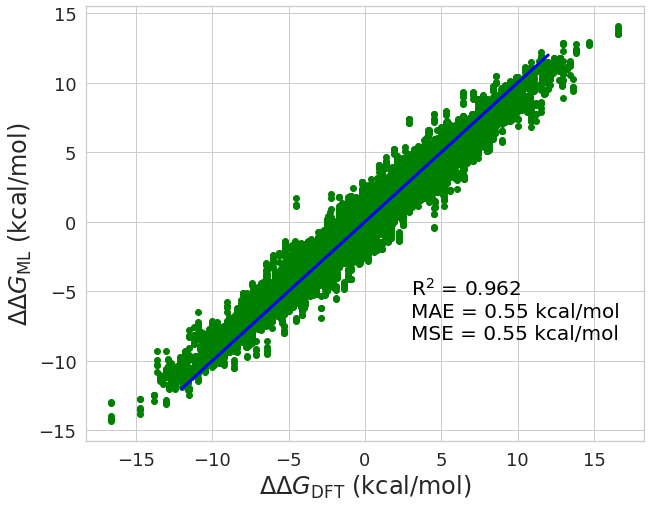

site_acc:  0.9331
degree_acc:  0.9047


In [12]:
predictor.n_jobs = 14
predictor.get_training_result(storage_folder='TrainSet_SOAP_fp_%s'%mode, notitle=True)

In [ ]:
# Save the model locally.
predictor.save_to_pkl(predictor)

In [ ]:
# Loading saved models from local
predictor = predictor.load_from_pkl()

In [ ]:
sub_ArR_DDG_dataset = SelectivityDataset(root='/PyScripts/PyTorch.dir/Radical/DataSet', mode='test_sub')
print(sub_ArR_DDG_dataset,'\n')
print(sub_ArR_DDG_dataset.data,'\n')


In [ ]:
mark = "Sub"
mode = 'MMFF94'
dataset = sub_ArR_DDG_dataset
try:
    del predictor.test_pred
except:
    pass
predictor.get_test_result(test_dataset=dataset,suffix=mark,storage_folder='TestSet_%s_SOAP_fp_%s'%(mark, mode))

# last line